# **data analysis**

In [ ]:
# https://huggingface.co/datasets/NebulaByte/E-Commerce_Customer_Support_Conversations

In [6]:
import pandas as pd

# Install pyarrow if not already installed
!pip install pyarrow

# Read the parquet file
try:
    df = pd.read_parquet('/content/train-00000-of-00001-a5a7c6e4bb30b016 (1).parquet')
    print("Parquet file loaded successfully.")
    # print(df.head())  # Print the head to verify
except Exception as e:
    print(f"Error loading parquet file: {e}")

Parquet file loaded successfully.


In [7]:
df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


In [ ]:
df.shape

(1000, 11)

In [ ]:
df.columns


Index(['issue_area', 'issue_category', 'issue_sub_category',
       'issue_category_sub_category', 'customer_sentiment', 'product_category',
       'product_sub_category', 'issue_complexity', 'agent_experience_level',
       'agent_experience_level_desc', 'conversation'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   issue_area                   1000 non-null   object
 1   issue_category               1000 non-null   object
 2   issue_sub_category           1000 non-null   object
 3   issue_category_sub_category  1000 non-null   object
 4   customer_sentiment           1000 non-null   object
 5   product_category             1000 non-null   object
 6   product_sub_category         1000 non-null   object
 7   issue_complexity             1000 non-null   object
 8   agent_experience_level       1000 non-null   object
 9   agent_experience_level_desc  1000 non-null   object
 10  conversation                 1000 non-null   object
dtypes: object(11)
memory usage: 86.1+ KB


In [ ]:
df.isnull().sum()

,0
issue_area,0
issue_category,0
issue_sub_category,0
issue_category_sub_category,0
customer_sentiment,0
product_category,0
product_sub_category,0
issue_complexity,0
agent_experience_level,0
agent_experience_level_desc,0


In [ ]:
df.describe()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,6,40,109,109,4,3,50,3,3,3,998
top,Cancellations and returns,Return and Exchange,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Vacuum Cleaner,less,junior,"handles customer inquiries independently, poss...","Agent: You're welcome, Jane. Have a great day!"
freq,286,95,17,17,552,465,28,488,507,507,3


In [ ]:
df["customer_sentiment"].unique()

array(['neutral', 'negative', 'frustrated', 'positive'], dtype=object)

In [ ]:
df["issue_area"].unique()

array(['Login and Account', 'Cancellations and returns', 'Order',
       'Shopping', 'Warranty', 'Shipping'], dtype=object)

**Data Preprocessing**

In [ ]:
import re

def clean_text(text):
  # Remove special characters and punctuation
  text = re.sub(r"[^\w\s]", " ", text)

  # Remove single characters
  text = re.sub(r"\b[a-zA-Z]\b", " ", text)

  # Remove HTML tags
  text = re.sub(r"<[^>]*>", " ", text)

  # Lowercase the text
  text = text.lower()

  # Remove extra whitespace
  text = re.sub(r"\s+", " ", text)

  # Trim leading and trailing spaces
  text = text.strip()

  return text

In [ ]:
import pandas as pd

# Extract the conversation column as a list
conversation = df['conversation'].tolist()

# Clean the text in the list
cleaned_conversation = [clean_text(conversation) for conversation in conversation]

# Add the cleaned conversation as a new column to the DataFrame
df['clean_conversation'] = cleaned_conversation

In [ ]:
df

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,clean_conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,agent thank you for calling brownbox customer ...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,agent thank you for calling brownbox customer ...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...,agent thank you for calling brownbox customer ...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi...",customer hi am facing an issue while logging i...
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...,agent thank you for contacting brownbox custom...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Cancellations and returns,Return and Exchange,Package open or tampered on delivery,Return and Exchange -> Package open or tampere...,negative,Electronics,Mobile,medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,agent thank you for calling brownbox customer ...
996,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Men/Women/Kids,Backpack,medium,junior,"handles customer inquiries independently, poss...","Customer: Hi, I received an email from BrownBo...",customer hi received an email from brownbox st...
997,Warranty,Warranty Terms and Changes,Warranty mismatch between the website and the ...,Warranty Terms and Changes -> Warranty mismatc...,negative,Appliances,Water Purifier,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,agent thank you for calling brownbox customer ...
998,Cancellations and returns,Return and Exchange,Checking the status of a refund,Return and Exchange -> Checking the status of ...,neutral,Appliances,Wet Grinder,medium,junior,"handles customer inquiries independently, poss...","Customer: Hi, I would like to check the status...",customer hi would like to check the status of ...


Correlation between issue_area and customer_sentiment: 0.09990407255208286


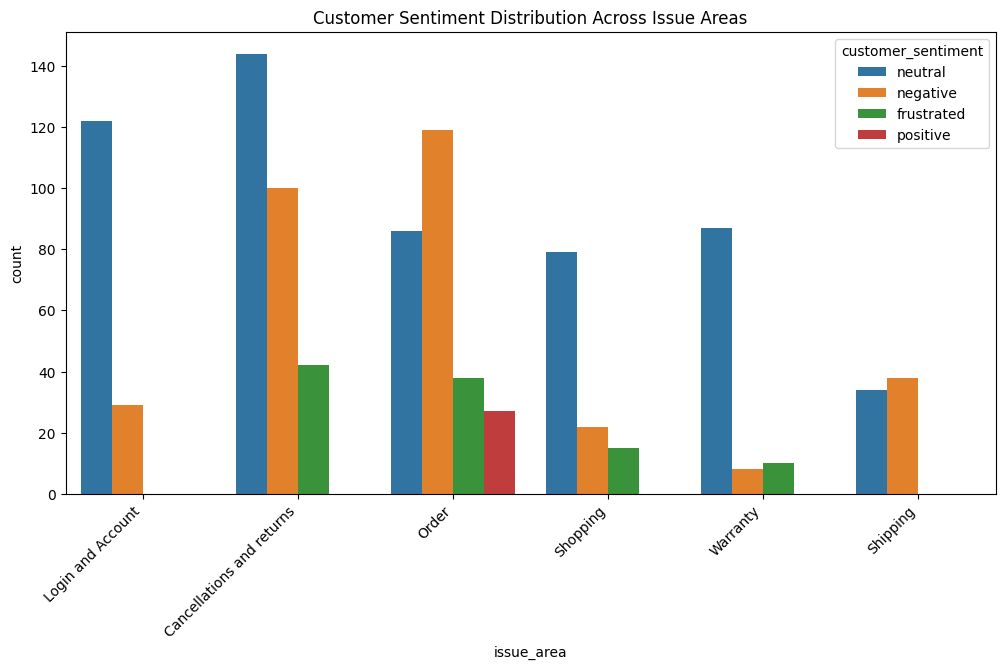

In [ ]:
# prompt: corelate issue_area and customer_sentiment

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation between 'issue_area' and 'customer_sentiment'
# First, convert categorical columns to numerical representations
from sklearn.preprocessing import LabelEncoder

le_issue = LabelEncoder()
le_sentiment = LabelEncoder()

df['issue_area_encoded'] = le_issue.fit_transform(df['issue_area'])
df['customer_sentiment_encoded'] = le_sentiment.fit_transform(df['customer_sentiment'])

correlation = df['issue_area_encoded'].corr(df['customer_sentiment_encoded'])
print(f"Correlation between issue_area and customer_sentiment: {correlation}")

# Grouped bar plot
plt.figure(figsize=(12,6))
sns.countplot(x='issue_area', hue='customer_sentiment', data=df)
plt.title('Customer Sentiment Distribution Across Issue Areas')
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
df["customer_sentiment"].unique()

array(['neutral', 'negative', 'frustrated', 'positive'], dtype=object)

In [ ]:
df['customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,552
negative,316
frustrated,105
positive,27


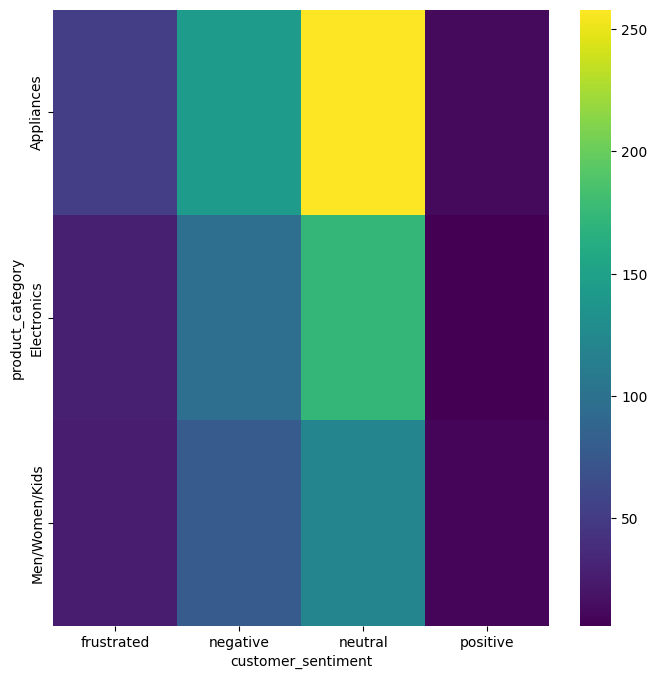

In [ ]:
# customer_sentiment vs product_category

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['product_category'].value_counts()
    for x_label, grp in df.groupby('customer_sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('customer_sentiment')
_ = plt.ylabel('product_category')

# **`sentiment analysis using api`**

In [ ]:
pip install -q -U google-generativeai

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-exp-1206
models/gemini-exp-1121
models/gemini-exp-1114
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental


In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("NebulaByte/E-Commerce_Customer_Support_Conversations")

# Preview the dataset structure
print(dataset)
print(dataset["train"][0])  # Inspect the first sample


DatasetDict({
    train: Dataset({
        features: ['issue_area', 'issue_category', 'issue_sub_category', 'issue_category_sub_category', 'customer_sentiment', 'product_category', 'product_sub_category', 'issue_complexity', 'agent_experience_level', 'agent_experience_level_desc', 'conversation'],
        num_rows: 1000
    })
})
{'issue_area': 'Login and Account', 'issue_category': 'Mobile Number and Email Verification', 'issue_sub_category': 'Verification requirement for mobile number or email address during login', 'issue_category_sub_category': 'Mobile Number and Email Verification -> Verification requirement for mobile number or email address during login', 'customer_sentiment': 'neutral', 'product_category': 'Appliances', 'product_sub_category': 'Oven Toaster Grills (OTG)', 'issue_complexity': 'medium', 'agent_experience_level': 'junior', 'agent_experience_level_desc': 'handles customer inquiries independently, possess solid troubleshooting skills, and seek guidance from more exp

In [ ]:
def get_sentiment(text):
    """
    Call the Gemini API to analyze sentiment for a given text.
    """
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are a helpful assistant that performs sentiment analysis."},
                {"role": "user", "content": f"Determine the sentiment of the following text: {text}. \
                                              The sentiment can be 'positive', 'negative', 'neutral', or 'frustrated'."}
            ],
        )
        sentiment = response["choices"][0]["message"]["content"]
        return sentiment.strip()
    except Exception as e:
        print(f"Error: {e}")
        return "error"


In [ ]:
res

,0
0,neutral
1,negative
2,neutral
3,positive
4,frustrated
5,positive
6,negative
7,neutral
8,positive
9,positive


In [ ]:
# prompt: find accuracy for res

accuracy = (res == df.iloc[:20, :]["customer_sentiment"]).sum() / 20 * 100
print(f"Accuracy: {accuracy}")

Accuracy: 35.0


In [1]:
def get_sentiment(conversation, issue_area):
    # Check for specific keywords and classify sentiment
    if "refund" in conversation.lower():
        return "negative"
    elif "happy" in conversation.lower():
        return "positive"
    elif "frustrated" in conversation.lower() or "annoyed" in conversation.lower():
        return "frustrated"  # Add logic for frustration
    else:
        return "neutral"  # Default to neutral if no keywords match


In [8]:
res = df.iloc[:20, :].apply(lambda x: get_sentiment(x["conversation"],x["issue_category_sub_category"]), axis=1)

In [9]:
res

,0
0,neutral
1,negative
2,neutral
3,positive
4,frustrated
5,positive
6,negative
7,neutral
8,positive
9,positive


In [10]:
(res == df.iloc[:20, :]["customer_sentiment"]).sum() / 20 * 100

35.0